In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [107]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [108]:
data = data.dropna()

In [109]:
data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [111]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [112]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

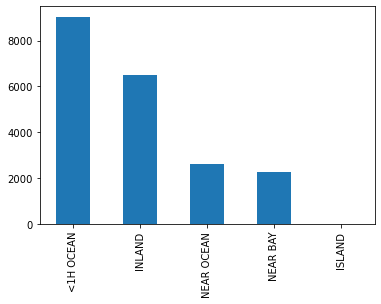

In [25]:
data.ocean_proximity.value_counts().plot.bar()

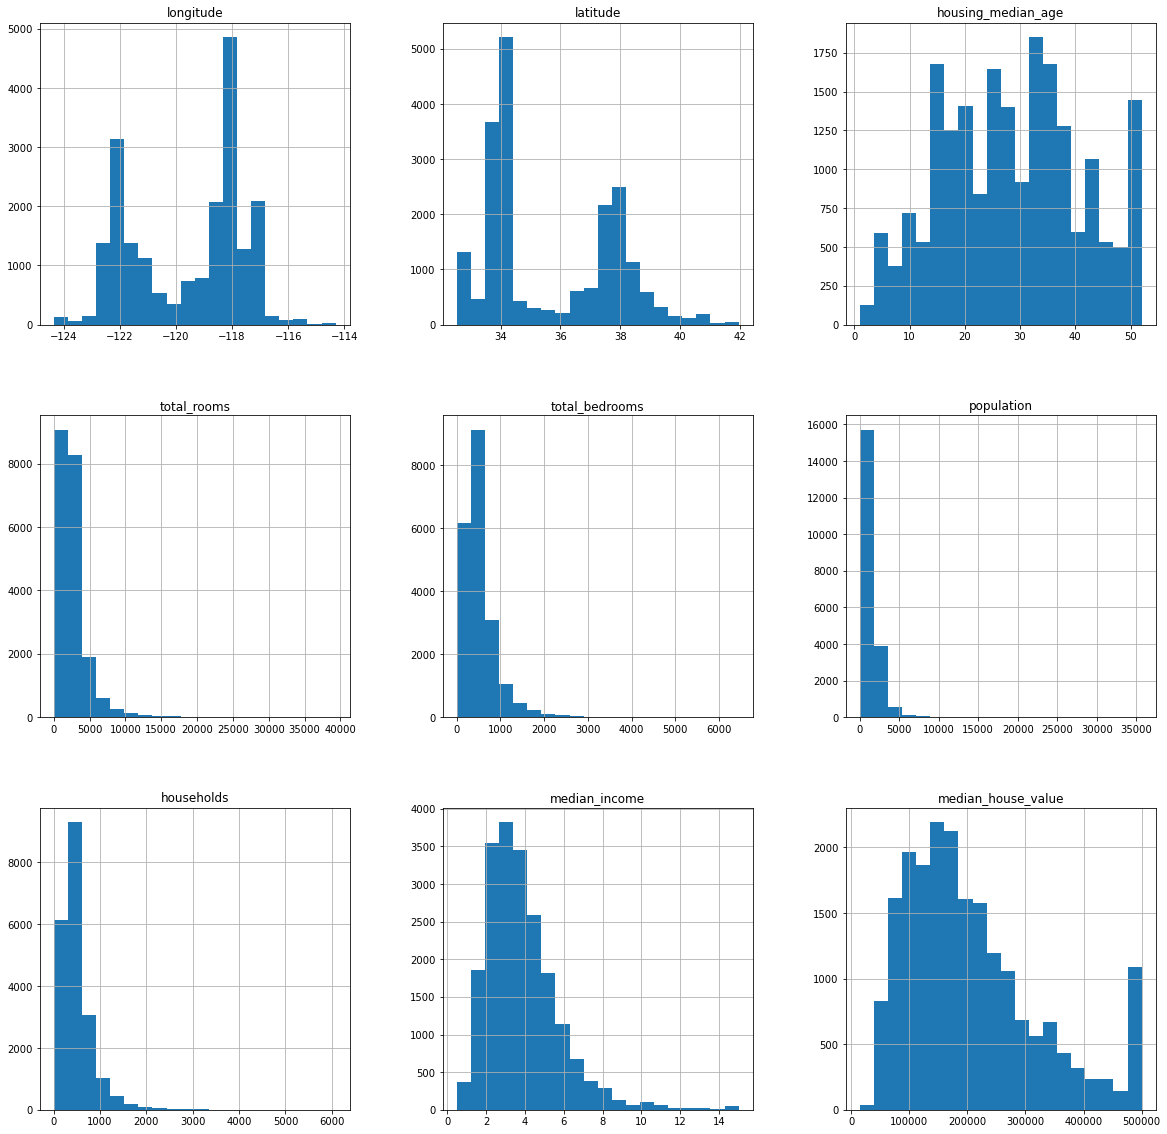

In [23]:
data.hist(bins = 20, figsize = (20, 20))
plt.show()

In [113]:
ocean_proximity = data['ocean_proximity']
median_val = data['median_house_value']
data = data.drop(['median_house_value','ocean_proximity'], axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [114]:
log_columns = ['households', 'population', 'total_rooms', 'total_bedrooms', 'median_income']
data[log_columns] = data[log_columns].apply(np.log)

z_scores = scipy.stats.zscore(data)
# z_scores1 = (data - data.mean())/data.std()
filtered_data = (np.abs(z_scores)<5).all(axis=1)
data = data[filtered_data]
ocean_proximity = ocean_proximity[filtered_data]
median_val = median_val[filtered_data]

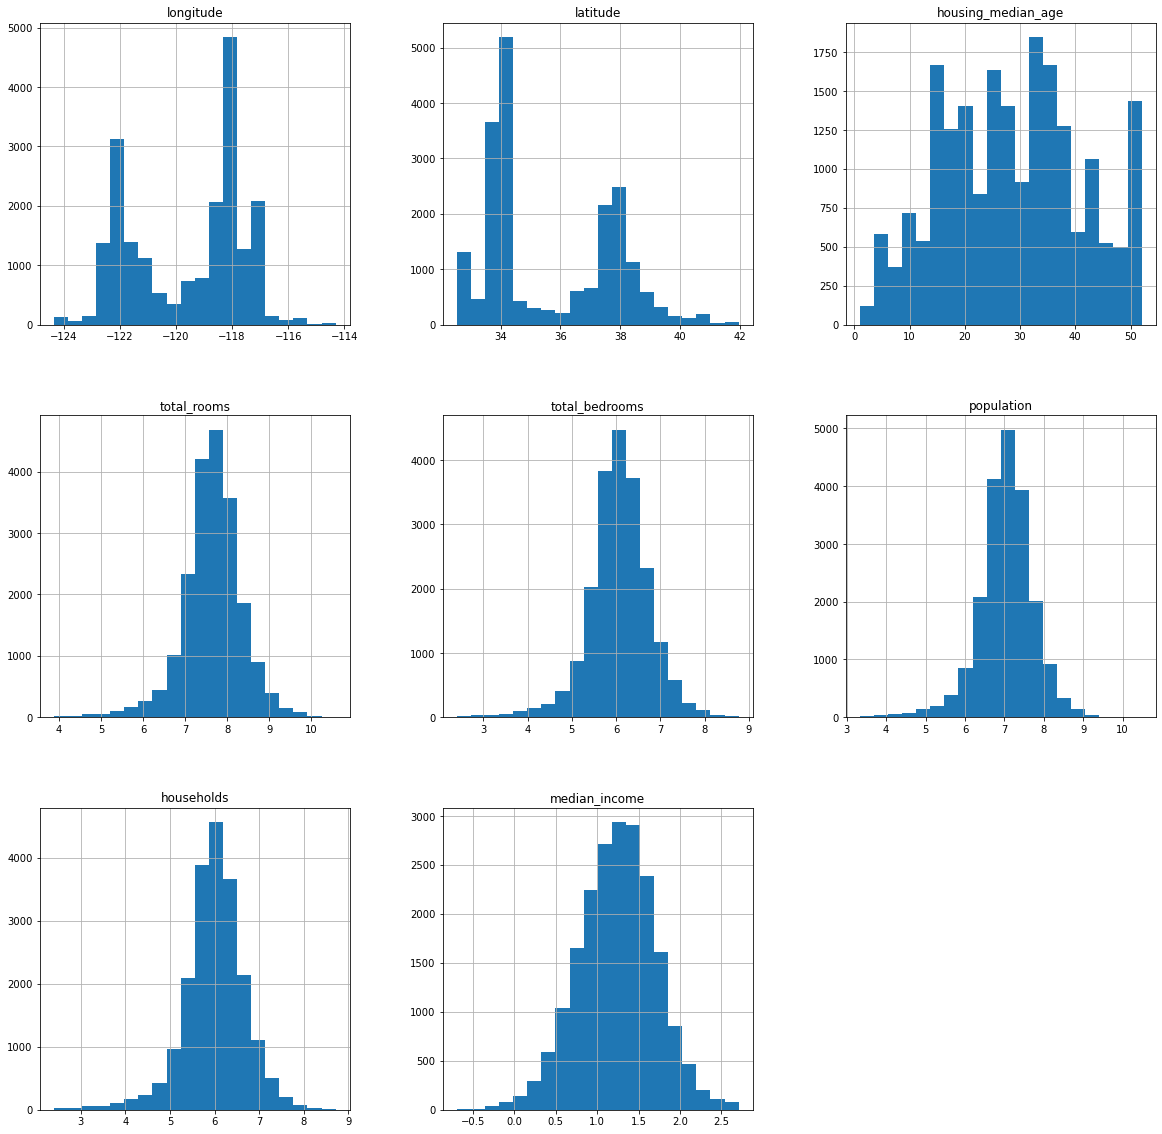

In [38]:
data.hist(bins = 20, figsize = (20, 20))
plt.show()

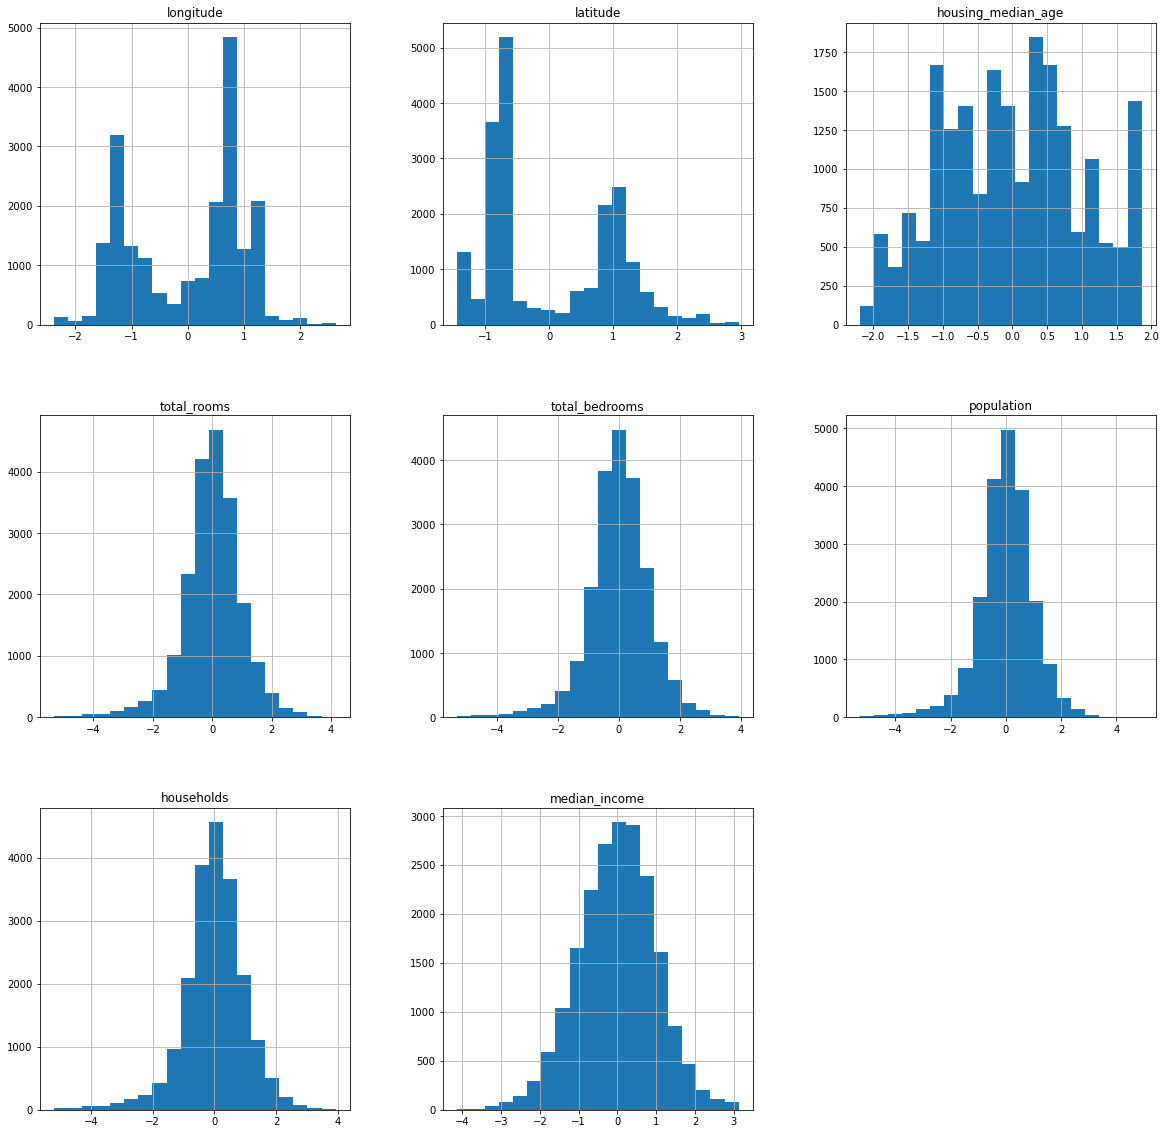

In [115]:
data = (data-data.mean())/data.std()
data.hist(bins = 20, figsize = (20, 20))
plt.show()

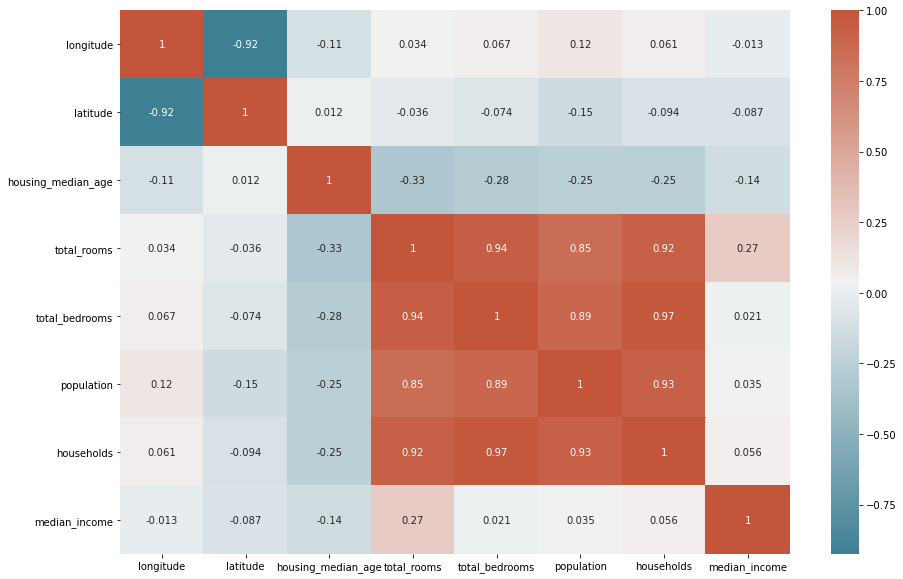

In [42]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [116]:
ocean_proximity_OH = pd.get_dummies(ocean_proximity, drop_first=True)
data_0 = pd.concat([data, ocean_proximity_OH], axis=1)
data_0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327361,1.051574,0.983757,-1.222445,-1.750218,-1.804309,-1.678375,1.867709,0,0,1,0
1,-1.322368,1.042213,-0.606185,1.728773,1.365949,1.064567,1.506259,1.861589,0,0,1,0
2,-1.332353,1.037532,1.858226,-0.500040,-1.188660,-1.187400,-1.186562,1.574305,0,0,1,0
3,-1.337346,1.037532,1.858226,-0.699434,-0.880390,-1.019212,-0.878449,1.036538,0,0,1,0
4,-1.337346,1.037532,1.858226,-0.353710,-0.626298,-1.001410,-0.635694,0.217136,0,0,1,0


In [117]:
x = data_0
y = median_val
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [83]:
x_ols = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_ols)
sm_ols = ols.fit()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     2215.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:28:44   Log-Likelihood:            -2.0499e+05
No. Observations:               16281   AIC:                         4.100e+05
Df Residuals:                   16268   BIC:                         4.101e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.19e+05    983.509    222.693      0.000    2.17e+05    2.21e+05
longitude          -6.088e+04   2436.667    -24.985      0.000   -6.57e+04   -5.61e+04
latitude           -6.364e+04   2575.453    -24.710      0.000   -6.87e+04   -5.86e+04
housing_median_age  1.313e+04    636.655     20.629      0.000    1.19e+04    1.44e+04
total_rooms        -2.025e+04   2732.789     -7.411      0.000   -2.56e+04   -1.49e+04
total_bedrooms      5.753e+04   3392.306     16.960      0.000    5.09e+04    6.42e+04
population         -6.336e+04   1597.722    -39.657      0.000   -6.65e+04   -6.02e+04
households          2.667e+04   3077.144      8.668      0.000    2.06e+04    3.27e+04
median_income       7.202e+04    970.900     74.182      0.000    7.01e+04    7.39e+04
INLAND             -3.548e+04   2063.008    -17.196      0.000   -3.95e+04   -3.14e+04
ISLAND               1.13e+05   3.19e+04      3.544      0.000    5.05e+04    1.75e+05
NEAR BAY           -4676.1693   2225.989     -2.101      0.036   -9039.352    -312.987
NEAR OCEAN         -1014.4157   1848.658     -0.549      0.583   -4637.988    2609.157
==============================================================================
Omnibus:                     3175.695   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8837.989
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                       5.950   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.Series([variance_inflation_factor(x_ols.values, i) 
               for i in range(1, x_ols.shape[1])], 
              index=x_ols.columns[1:]).sort_values(ascending=False)
VIFs

total_bedrooms        37.101671
households            30.500086
total_rooms           24.083896
latitude              21.304548
longitude             19.083583
population             8.198057
median_income          3.035035
INLAND                 2.969247
NEAR BAY               1.572059
housing_median_age     1.308622
NEAR OCEAN             1.218083
ISLAND                 1.004039
dtype: float64

In [97]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_cv = RidgeCV(alphas = np.arange(0.1, 10, 0.05), cv = 5)
ridge_cv_res = ridge_cv.fit(x_train, y_train)
print(ridge_cv_res.alpha_)
pred_train_ridge= ridge_cv_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge_cv_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge)))

0.1
71111.96744772365
70284.25578888229


In [98]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso_cv = LassoCV(alphas = np.arange(0.1, 10, 0.05), cv = 5)
lasso_cv_res = lasso_cv.fit(x_train, y_train)
print(lasso_cv_res.alpha_)
pred_train_lasso= lasso_cv_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
pred_test_lasso= lasso_cv_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

0.1
71111.95702607295
70284.29325022997


71111.95678584707
70284.28660196194


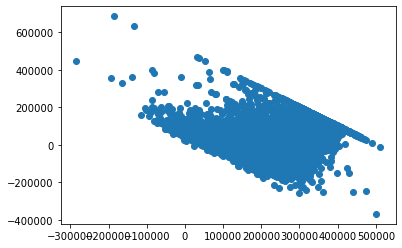

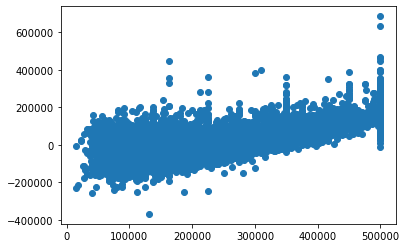

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_res = lr.fit(x_train, y_train)
pred_train_lr= lr_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
pred_test_lr= lr_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
residuals = y_train - pred_train_lr
plt.scatter(pred_train_lr, residuals)
plt.show()
plt.scatter(y_train, residuals)
plt.show()

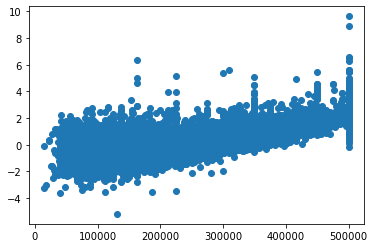

In [87]:
#create instance of influence
influence = sm_ols.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
plt.scatter(y_train, standardized_residuals)
plt.show()

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 5, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=0, random_state=33, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)
pred_rf_random_train = rf_random.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_rf_random_train)))
pred_rf_random_test = rf_random.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_rf_random_test)))


27921.35385428466
47614.8885919216


In [92]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [20, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 50]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
# Fit the grid search model
rf_grid.fit(x_train, y_train)
pred_rf_grid_train = rf_grid.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_rf_grid_train)))
pred_rf_grid_test = rf_grid.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_rf_grid_test)))


22038.38110820934
47168.91765123016


Text(0, 0.5, 'Feature Importance Score')

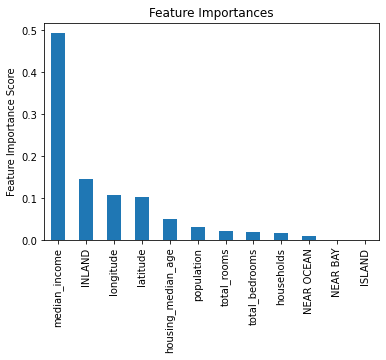

In [93]:
feat_imp = pd.Series(rf_grid.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Text(0, 0.5, 'Feature Importance Score')

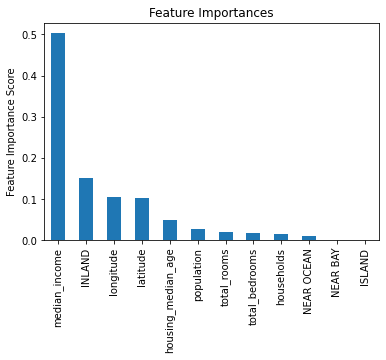

In [94]:
feat_imp = pd.Series(rf_random.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=300, min_samples_leaf=100,max_depth=8,
                                max_features='auto',subsample=0.8,random_state=33)
param_test1 = {'n_estimators':range(20,101,20)}
gs_gbr1 = GridSearchCV(estimator = gbr, param_grid = param_test1, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
gs_gbr1.fit(x_train, y_train)
print(gs_gbr1.best_params_)
# print(gs_gbr1.cv_results_)

{'n_estimators': 100}


In [151]:
pred_gs_gbr1_train = gs_gbr1.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gs_gbr1_train)))
pred_gs_gbr1_test = gs_gbr1.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gs_gbr1_test)))

43763.75652904939
47457.77272690679


In [152]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators = 100,
                                max_features='auto',subsample=0.8,random_state=33)
param_test2 = {'max_depth':range(5,11,2), 'min_samples_split':range(100,601,200), 'min_samples_leaf':range(50,101,20)}
gs_gbr2 = GridSearchCV(estimator = gbr, param_grid = param_test2, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
gs_gbr2.fit(x_train, y_train)
print(gs_gbr2.best_params_)
# print(gs_gbr1.cv_results_)

{'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [153]:
pred_gs_gbr2_train = gs_gbr2.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gs_gbr2_train)))
pred_gs_gbr2_test = gs_gbr2.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gs_gbr2_test)))

38373.85070817028
45729.067721732


Text(0, 0.5, 'Feature Importance Score')

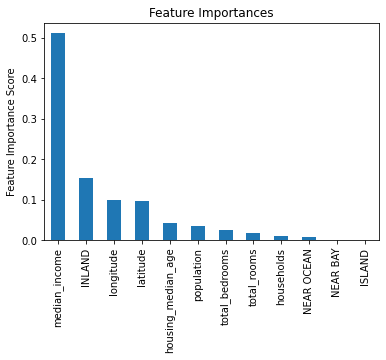

In [154]:
feat_imp_gbr = pd.Series(gs_gbr2.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=False)
feat_imp_gbr.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [156]:
gbr = GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=50, n_estimators = 200, max_depth = 9, 
                                min_samples_split = 100, 
                                max_features='sqrt',subsample=0.8,random_state=33)
gbr.fit(x_train, y_train)
pred_gbr_train = gbr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gbr_train)))
pred_gbr_test = gbr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gbr_test)))

40367.43947261687
46537.01612055078
